#**Human Stress Level Detection**



In [1]:
#importing libraries
import warnings
warnings.filterwarnings("ignore") #for ignoring warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Data collection & Cleaning


In [2]:
#loading the data from csv file to a pandas dataframe
#change the path of csv file according to your directory
raw_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Major Project MCA/SaYoPillow.csv')
print(raw_data)

        sr      rr       t      lm      bo    rem   sr.1     hr           sl
0    93.80  25.680  91.840  16.600  89.840  99.60  1.840  74.20  medium high
1    91.64  25.104  91.552  15.880  89.552  98.88  1.552  72.76  medium high
2    60.00  20.000  96.000  10.000  95.000  85.00  7.000  60.00   medium low
3    85.76  23.536  90.768  13.920  88.768  96.92  0.768  68.84  medium high
4    48.12  17.248  97.872   6.496  96.248  72.48  8.248  53.12   low/normal
..     ...     ...     ...     ...     ...    ...    ...    ...          ...
635  71.68  21.168  93.168  11.168  91.168  90.84  3.752  62.92       medium
636  59.04  19.808  95.808   9.808  94.712  84.52  6.880  59.52   medium low
637  82.88  22.768  90.384  12.960  88.384  95.96  0.384  66.92  medium high
638  62.40  20.240  92.240  10.240  90.240  86.20  2.360  60.60       medium
639  62.40  20.240  92.240  10.240  90.240  86.20  2.360  60.60       medium

[640 rows x 9 columns]




  **Attribute's abbreviation**
  *  sr-snoring range
  * rr-respiration rate
  * t-body temperature(F)
  * lm-limb movement rate
  * bo-blood oxygen levels
  * rem-eye movement
  * sr.1-number of hours of sleep
  * hr-heart rate
  * sl-Stress Levels












In [3]:
# renaming the column name
raw_data.columns=['snoring_rate', 'respiration_rate', 'body_temperature', 'limb_movement', 'blood_oxygen_lv',
                  'eye_movement', 'sleeping_hours', 'heart_rate', 'stress_level']

In [4]:
raw_data.head()

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen_lv,eye_movement,sleeping_hours,heart_rate,stress_level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,medium high
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,medium high
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,medium low
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,medium high
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,low/normal


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   snoring_rate      640 non-null    float64
 1   respiration_rate  640 non-null    float64
 2   body_temperature  640 non-null    float64
 3   limb_movement     640 non-null    float64
 4   blood_oxygen_lv   640 non-null    float64
 5   eye_movement      640 non-null    float64
 6   sleeping_hours    513 non-null    float64
 7   heart_rate        640 non-null    float64
 8   stress_level      640 non-null    object 
dtypes: float64(8), object(1)
memory usage: 45.1+ KB


<Axes: >

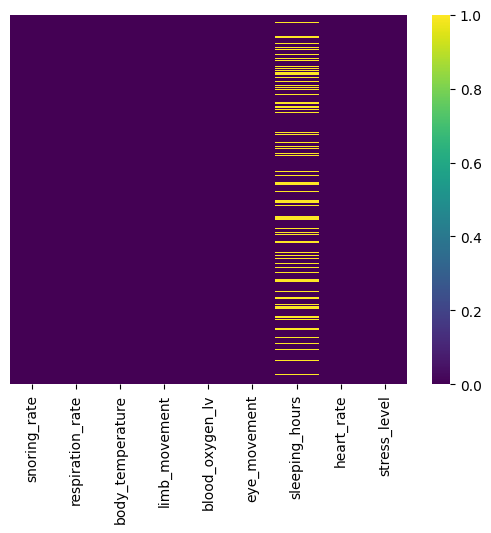

In [6]:
sns.heatmap(raw_data.isnull(), yticklabels = False, cbar = True, cmap = 'viridis')
# cbar : boolean, optional: Whether to draw a colorbar.
# new matplotlib default colormap (“viridis”)

In [7]:
#checking missing values
raw_data.isna().sum()


snoring_rate          0
respiration_rate      0
body_temperature      0
limb_movement         0
blood_oxygen_lv       0
eye_movement          0
sleeping_hours      127
heart_rate            0
stress_level          0
dtype: int64

In [8]:
#let us first encode stress_column's value to numeric dtype
raw_data['stress_level'].unique()

array(['medium high', 'medium low', 'low/normal', 'medium', 'high'],
      dtype=object)

The dependent variable (Y) is the stress level, can be categorized by encoding:\
0: Low/Normal  
1: Medium Low\
2: Medium\
3: Medium High\
4: High

In [9]:
def encode_stress_level(x):
  if x=='low/normal': return 0
  elif x=='medium low': return 1
  elif x=='medium': return 2
  elif x=='medium high': return 3
  else: return 4

raw_data['stress_level'] = raw_data['stress_level'].apply(encode_stress_level)


In [10]:
raw_data.head()

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen_lv,eye_movement,sleeping_hours,heart_rate,stress_level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


<Axes: >

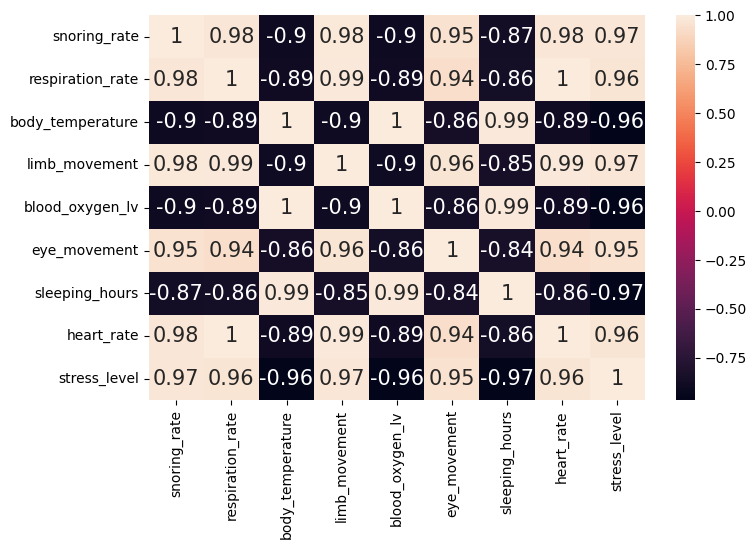

In [11]:
#correlation between the attributes
plt.figure(figsize = (8, 5))     #width & height
sns.heatmap(raw_data.corr(), annot = True, annot_kws = {"size":15})

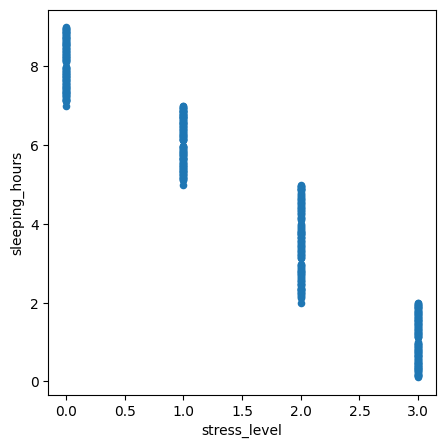

In [12]:
# plot multiple columns i.e., sleeping_hours and stress_level
raw_data.plot(kind="scatter",x="stress_level", y="sleeping_hours",figsize=(5, 5))

# display plot
plt.show()

Here,we can observe that stress_level is 3 i.e,medium high when sleeping_hours is between 0 and 2 hours

In [13]:
#lets check what is the stress_level where sleeping_hours is NaN

stress_level_details = raw_data[raw_data['sleeping_hours'].isna()]['stress_level']
print(stress_level_details.value_counts())

stress_level
4    126
3      1
Name: count, dtype: int64


So,we can assume that NaN values in sleeping_hours indicating towards HIGH stress_level i.e., 4

In [14]:
# filling NaN values with 0
def check_nan(x):
  if pd.isna(x): return 0
  else: return x
raw_data['sleeping_hours'] = raw_data['sleeping_hours'].apply(check_nan)

raw_data.tail(15)

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen_lv,eye_movement,sleeping_hours,heart_rate,stress_level
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1
629,73.920,21.392,93.392,11.392,91.392,91.96,4.880,63.48,2
630,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1
631,73.920,21.392,93.392,11.392,91.392,91.96,4.880,63.48,2
632,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
633,58.800,19.760,95.760,9.760,94.640,84.40,6.760,59.40,1
634,65.440,20.544,92.544,10.544,90.544,87.72,2.816,61.36,2


<Axes: >

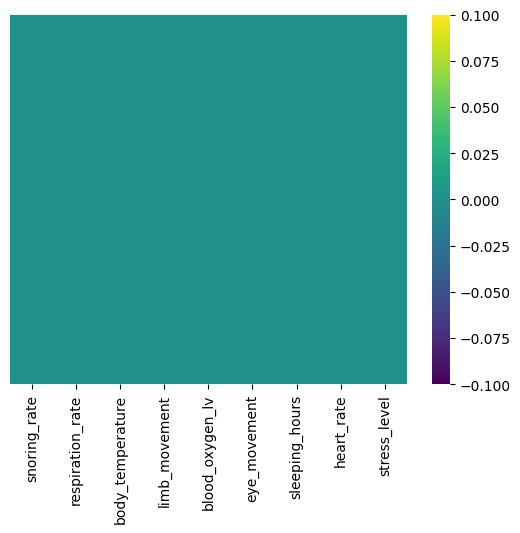

In [15]:
#checking missing values
raw_data.isnull().sum()

sns.heatmap(raw_data.isnull(), yticklabels = False, cbar = True, cmap = 'viridis')

Now, there is no Missing Values

In [16]:
#check duplicate values
raw_data.duplicated().sum()

10

In [17]:
#removing duplicates and note-> keep='first' means that when there are duplicate rows in a DataFrame,
#the first occurrence of each duplicate row will be kept and all subsequent occurrences will be dropped.
raw_data=raw_data.drop_duplicates(keep='first')

raw_data.duplicated().sum()

0

In [18]:
#checking rows and column number
raw_data.shape

(630, 9)

snoring_rate        0.113935
respiration_rate    0.455863
body_temperature   -0.285751
limb_movement       0.162667
blood_oxygen_lv    -0.360655
eye_movement       -0.573879
sleeping_hours      0.167023
heart_rate          0.455863
stress_level        0.000000
dtype: float64


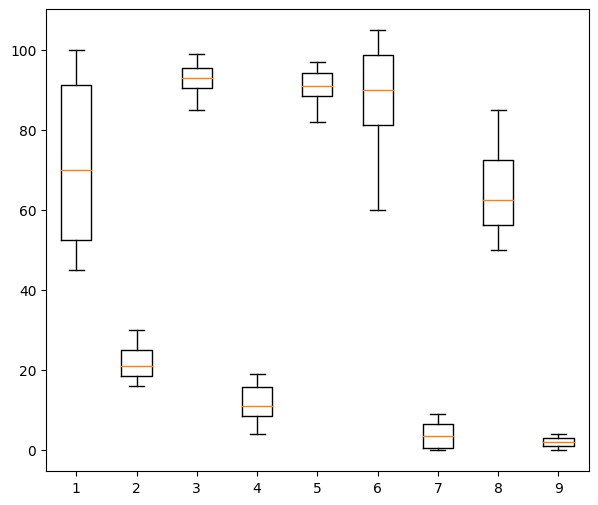

In [19]:
#Checking for Outlier
print(raw_data.skew())     #between 1 to -1 value says that it is skewwed,beyond that we can say that there is an outlier

plt.figure(figsize=(7,6))
plt.boxplot(raw_data)             #according to our observation there is no outliers as no that much spreadness
plt.show()

### Exploratory Data Analysis

In [20]:
raw_data['stress_level'].value_counts()   #number of data in each group of stress_level

stress_level
3    126
1    126
0    126
2    126
4    126
Name: count, dtype: int64

In [21]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
snoring_rate,630.0,71.6000,19.372833,45.0,52.500,70.00,91.250,100.0
respiration_rate,630.0,21.8000,3.966111,16.0,18.500,21.00,25.000,30.0
body_temperature,630.0,92.8000,3.529690,85.0,90.500,93.00,95.500,99.0
limb_movement,630.0,11.7000,4.299629,4.0,8.500,11.00,15.750,19.0
blood_oxygen_lv,630.0,90.9000,3.902483,82.0,88.500,91.00,94.250,97.0
eye_movement,630.0,88.5000,11.893747,60.0,81.250,90.00,98.750,105.0
sleeping_hours,630.0,3.7432,3.065893,0.0,0.548,3.56,6.558,9.0
heart_rate,630.0,64.5000,9.915277,50.0,56.250,62.50,72.500,85.0
stress_level,630.0,2.0000,1.415337,0.0,1.000,2.00,3.000,4.0


<Axes: xlabel='stress_level', ylabel='count'>

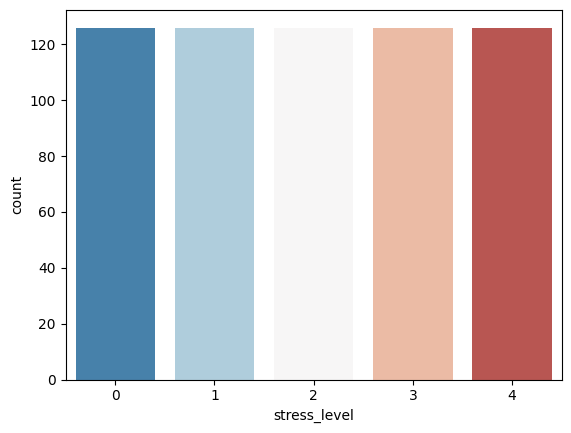

In [22]:
sns.countplot(data = raw_data, x = "stress_level",palette = 'RdBu_r')     ## data is grouped equally with people from all stress levels.


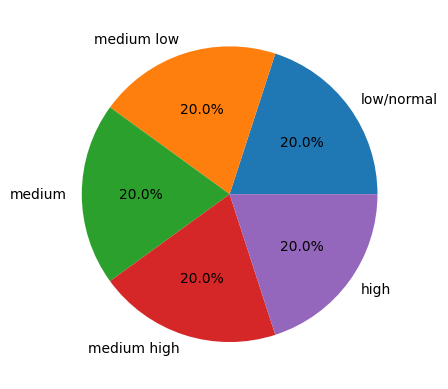

In [23]:
plt.pie(raw_data['stress_level'].value_counts() ,labels=['low/normal','medium low','medium','medium high','high'],autopct="%0.1f%%")
plt.show()

In [24]:
raw_data.groupby('stress_level').mean()

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen_lv,eye_movement,sleeping_hours,heart_rate
stress_level,,,,,,,,
0,47.5,17.0,97.5,6.0,96.0,70.0,8.054,52.5
1,55.0,19.0,95.0,9.0,93.5,82.5,6.054,57.5
2,70.0,21.0,93.0,11.0,91.0,90.0,3.554,62.5
3,87.5,24.0,91.0,14.5,89.0,97.5,1.054,70.0
4,98.0,28.0,87.5,18.0,85.0,102.5,0.000,80.0


In [25]:
raw_data.groupby('stress_level').max()

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen_lv,eye_movement,sleeping_hours,heart_rate
stress_level,,,,,,,,
0,50.0,18.0,99.0,8.0,97.0,80.0,9.0,55.0
1,60.0,20.0,96.0,10.0,95.0,85.0,7.0,60.0
2,80.0,22.0,94.0,12.0,92.0,95.0,5.0,65.0
3,95.0,26.0,92.0,17.0,90.0,100.0,2.0,75.0
4,100.0,30.0,90.0,19.0,88.0,105.0,0.0,85.0


In [26]:
raw_data.groupby('stress_level').min()

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen_lv,eye_movement,sleeping_hours,heart_rate
stress_level,,,,,,,,
0,45.0,16.0,96.0,4.0,95.0,60.0,7.0,50.0
1,50.0,18.0,94.0,8.0,92.0,80.0,5.0,55.0
2,60.0,20.0,92.0,10.0,90.0,85.0,2.0,60.0
3,80.0,22.0,90.0,12.0,88.0,95.0,0.0,65.0
4,96.0,26.0,85.0,17.0,82.0,100.0,0.0,75.0


In [27]:
raw_data.groupby('stress_level').var()

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen_lv,eye_movement,sleeping_hours,heart_rate
stress_level,,,,,,,,
0,2.133600,0.341376,0.768096,1.365504,0.341376,34.1376,0.328623,2.1336
1,8.534400,0.341376,0.341376,0.341376,0.768096,2.1336,0.328623,2.1336
2,34.137600,0.341376,0.341376,0.341376,0.341376,8.5344,0.749871,2.1336
3,19.202400,1.365504,0.341376,2.133600,0.341376,2.1336,0.328623,8.5344
4,1.365504,1.365504,2.133600,0.341376,3.072384,2.1336,0.000000,8.5344


<Axes: >

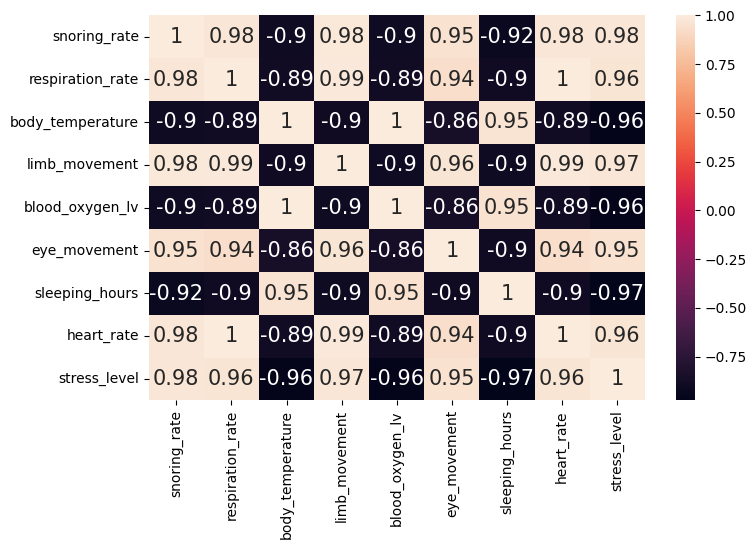

In [28]:
#correlation matrix heatmap
plt.figure(figsize = (8, 5))
sns.heatmap(raw_data.corr(), annot = True, annot_kws = {"size":15})

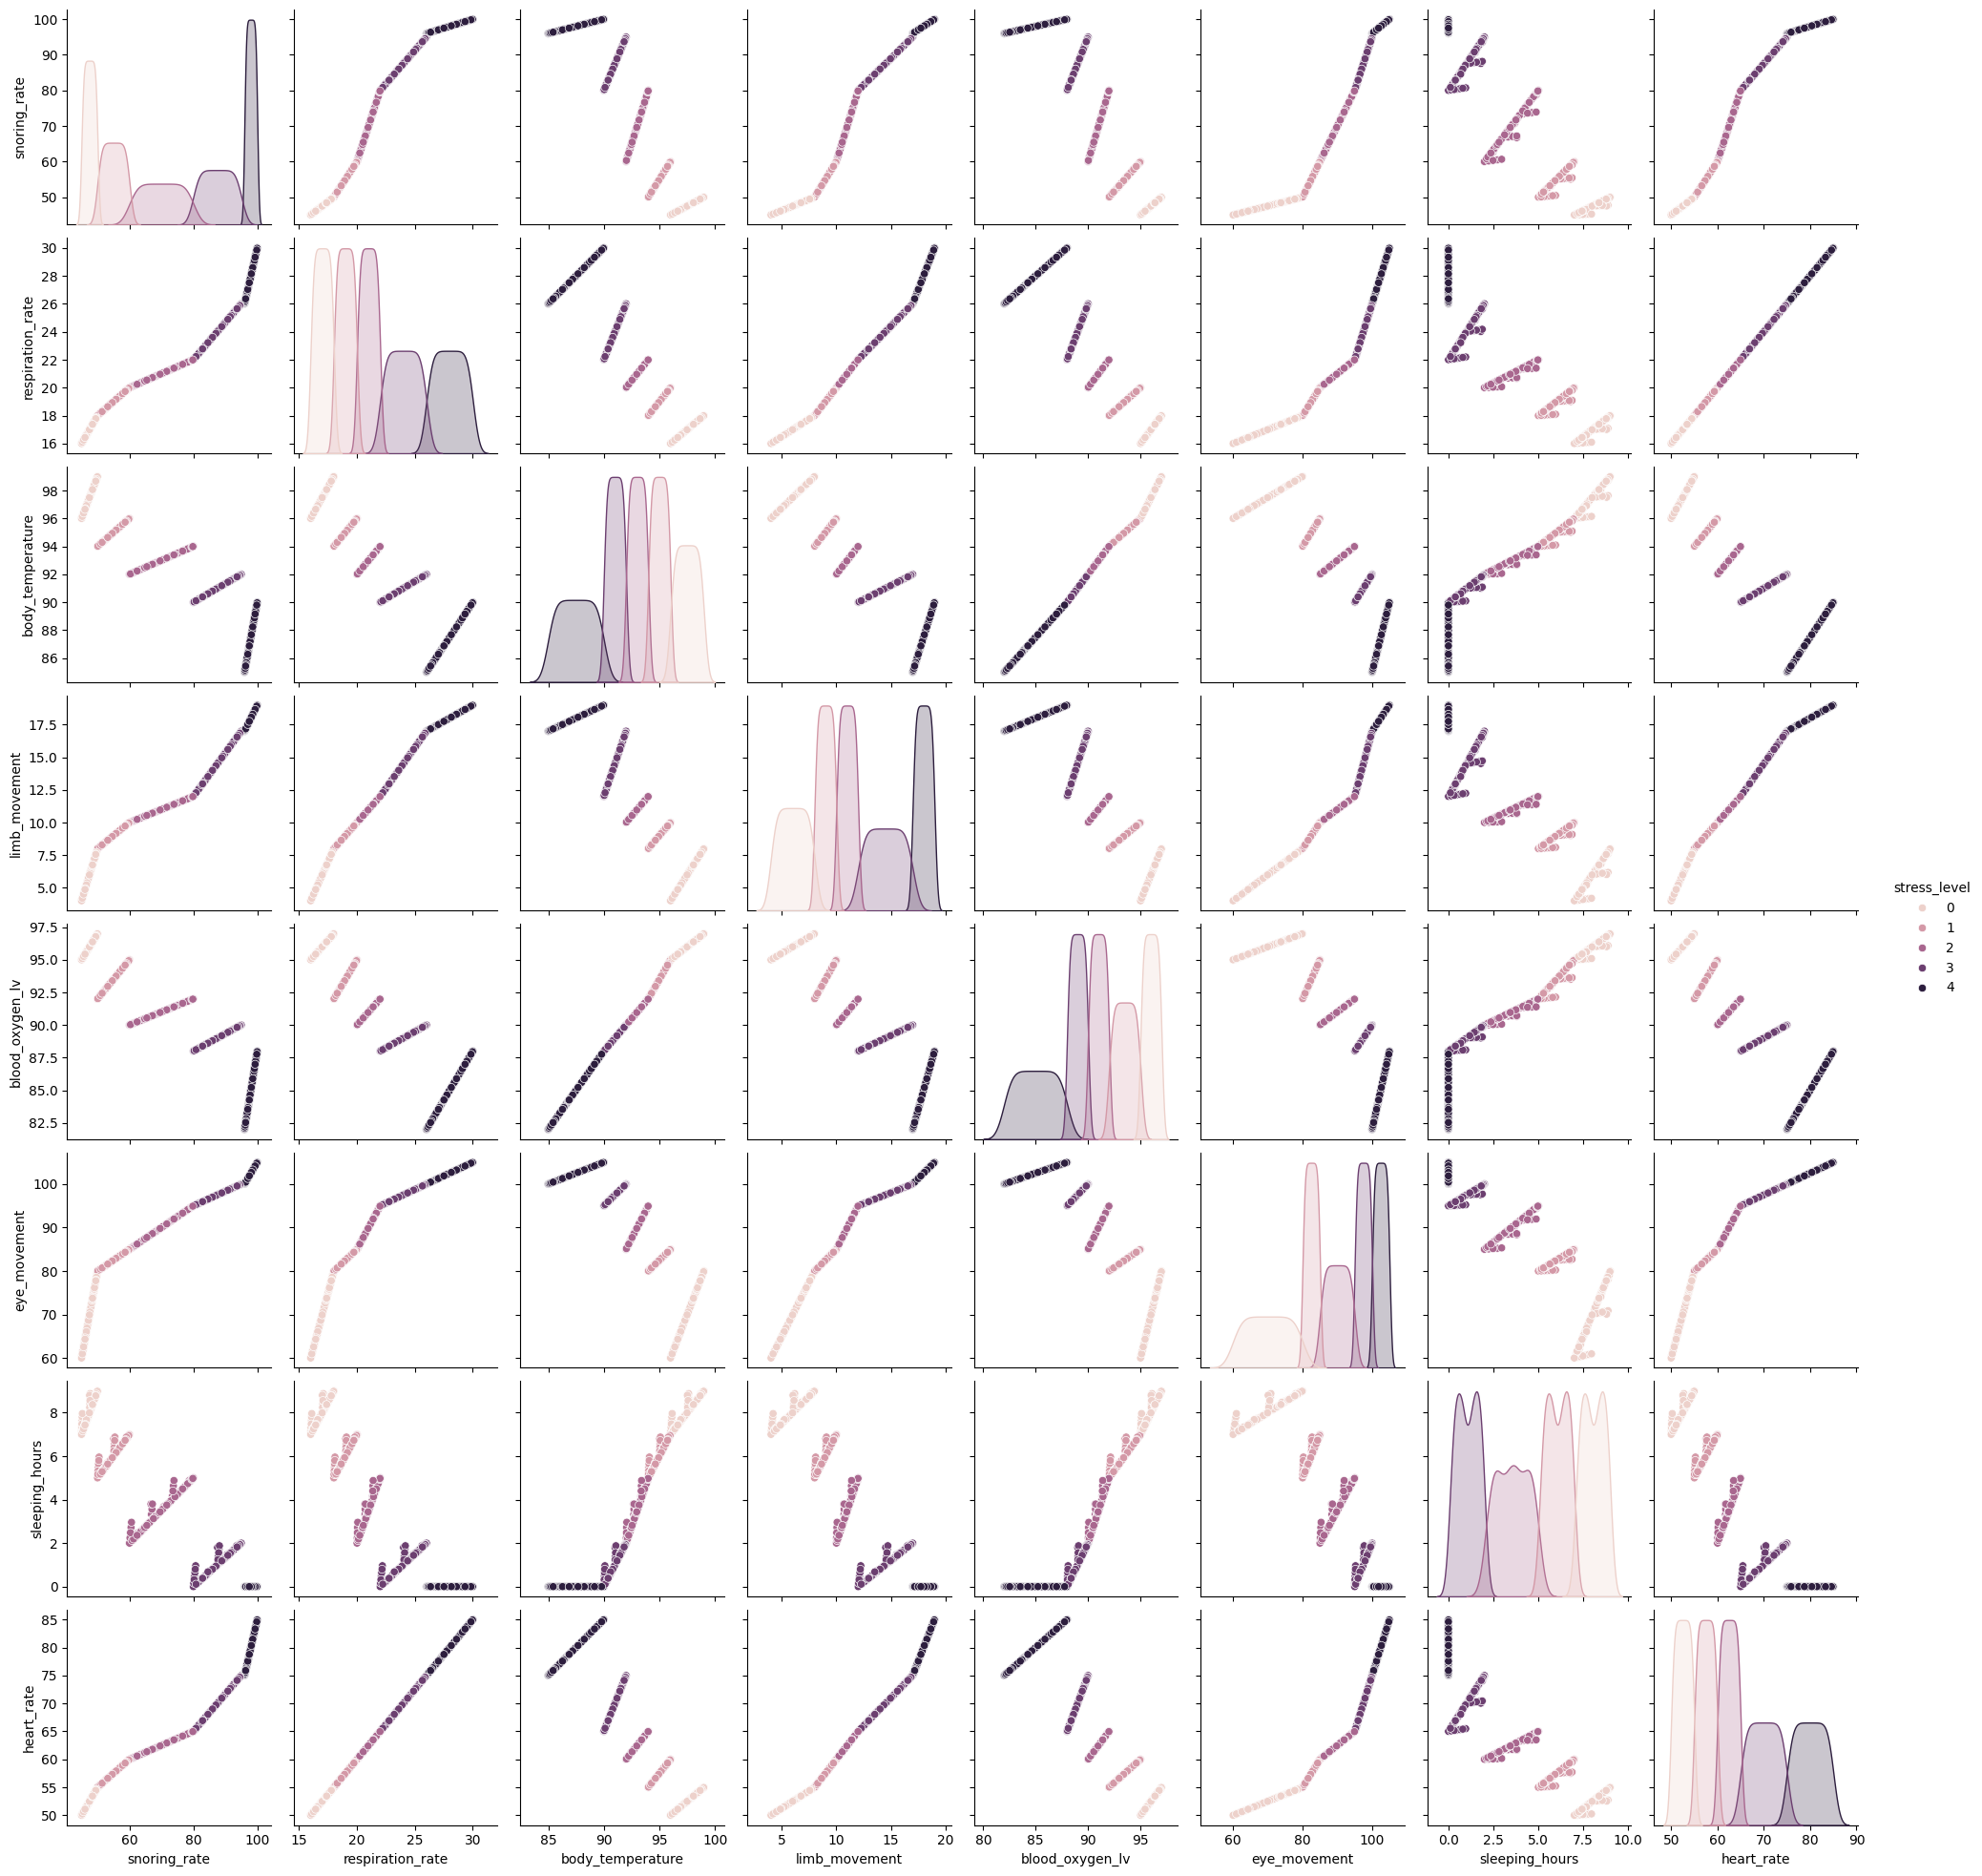

In [29]:
sns.pairplot(raw_data,hue='stress_level')   #relation among each column using stress_level

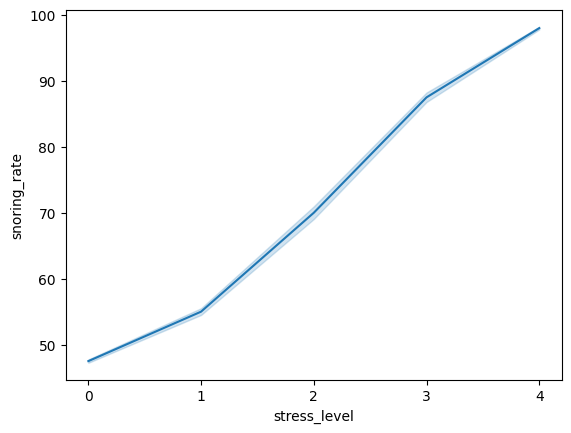

In [30]:
#stress_level VS sleeping_hours
sns.lineplot(data=raw_data, x='stress_level',y='snoring_rate')
plt.xticks([0, 1, 2, 3,4])
plt.show()

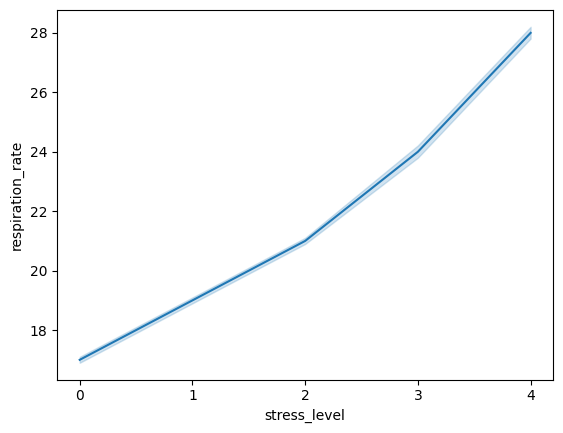

In [31]:
#stress_level VS respiration_rate
sns.lineplot(data=raw_data, x='stress_level',y='respiration_rate')
plt.xticks([0, 1, 2, 3, 4])
plt.show()

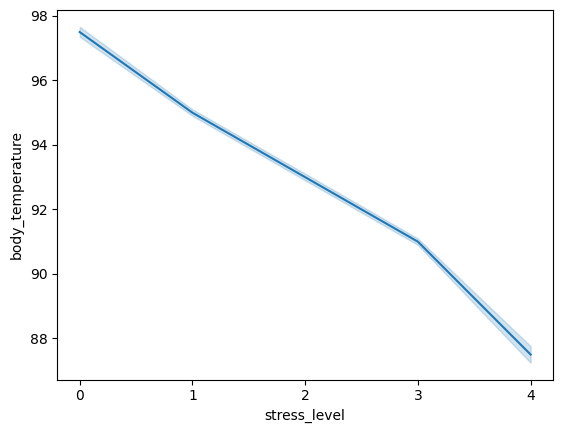

In [32]:
#stress_level VS body_temperature
sns.lineplot(data=raw_data, x='stress_level',y='body_temperature')
plt.xticks([0, 1, 2, 3, 4])
plt.show()

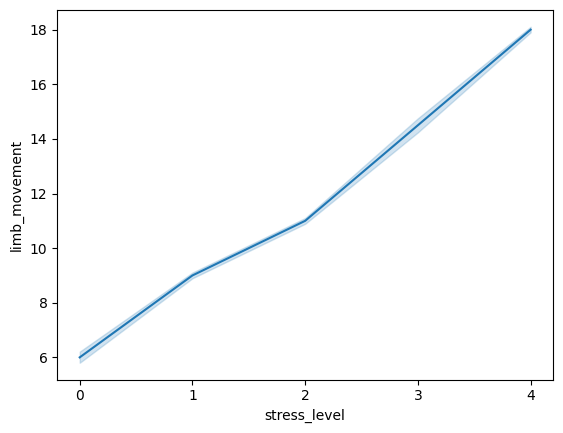

In [33]:
#stress_level VS limb_movement
sns.lineplot(data=raw_data, x='stress_level',y='limb_movement')
plt.xticks([0, 1, 2, 3, 4])
plt.show()

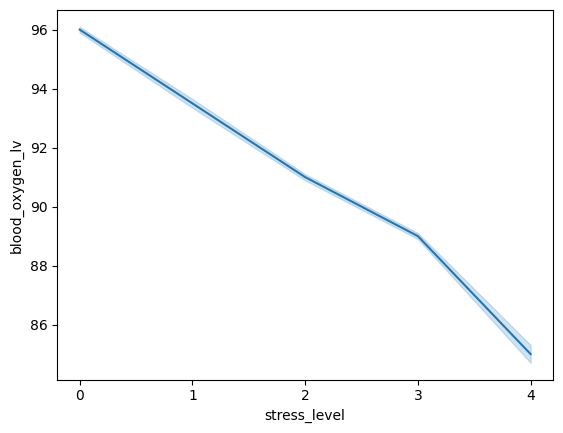

In [34]:
#stress_level VS blood_oxygen_lv
sns.lineplot(data=raw_data, x='stress_level',y='blood_oxygen_lv')
plt.xticks([0, 1, 2, 3, 4])
plt.show()

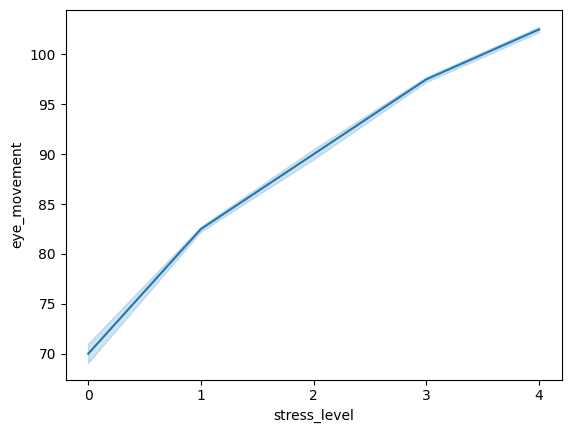

In [35]:
#stress_level VS eye_movement
sns.lineplot(data=raw_data, x='stress_level',y='eye_movement')
plt.xticks([0, 1, 2, 3, 4])
plt.show()

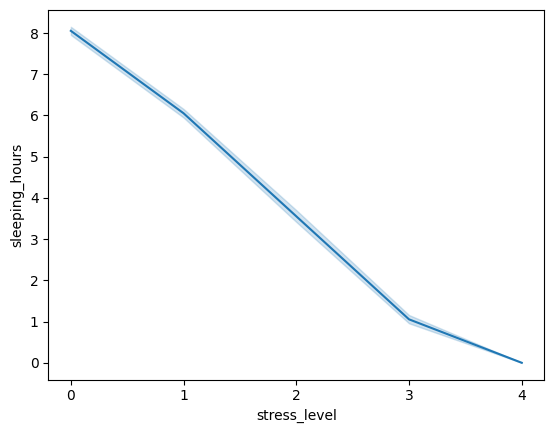

In [36]:
#stress_level VS sleeping_hours
sns.lineplot(data=raw_data, x='stress_level',y='sleeping_hours')
plt.xticks([0, 1, 2, 3, 4])
plt.show()

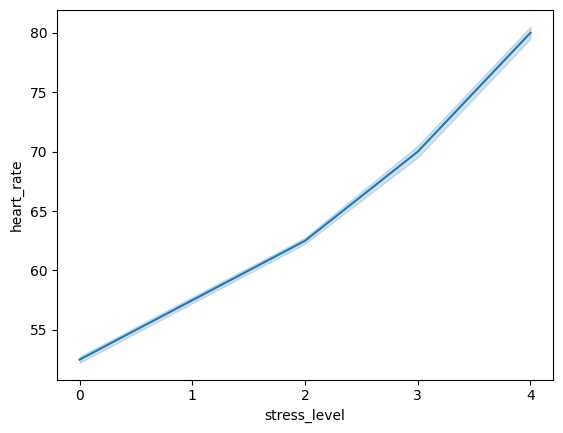

In [37]:
#stress_level VS heart_rate
sns.lineplot(data=raw_data, x='stress_level',y='heart_rate')
plt.xticks([0, 1, 2, 3, 4])
plt.show()

So, we got observations-
* The higher a person’s Snoring Rate, the greater the likelihood of a person being diagnosed with level 4 stress.
* The lower a person’s Respiration Rate, the higher the likelihood of a person being diagnosed with a low stress level (directly proportional).
* The higher a person’s body temperature, the greater the likelihood of a person being diagnosed with a low stress level (inversely proportional).
* The higher a person’s Limb Movement, the greater the likelihood of a person being diagnosed with a high level of stress (directly proportional).
* The higher a person’s Blood Oxygen, the greater the likelihood of a person being diagnosed with a low stress level (inversely proportional).
* The higher a person’s Eye Movement, the greater the likelihood of a person being diagnosed with a high level of stress (directly proportional).
* Individuals with 0–4 hours of sleep tend to have a high level of stress, while those with 6–8 hours of sleep have a low level of stress.Stress Levels and Sleeping Hours are strongly negatively correlated. The more person sleep, the less they are likely to be stressed.
* Individuals with a heart rate of 50–65 tend to have a low stress level, while those with a heart rate of 65–85 tend to have a high stress level.

### Feature engineering & Feature selection

In [38]:
#below library is used to split a dataset into training and test sets.
#It takes an array of data and an array of target values as input,
#and returns four arrays: the training data, the test data, the training target values, and the test target values.
from sklearn.model_selection import train_test_split

# Splitting the dataset into features(x i.e., independent) and target variable (y i.e., dependent)
x = raw_data.drop(['stress_level'], axis=1)
y = raw_data['stress_level']

# Splitting the dataset into training and testing sets
#it's set to 0.2, meaning 20% of the data will be used for testing
#AND random_state with any fixed value is assigned to generate same values in train and test dataset each time.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)     #random_state=100 means random_seed set to 100

# Printing the shapes of training and testing sets
print("x_train shape:",x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (504, 8)
y_train shape: (504,)
x_test shape: (126, 8)
y_test shape: (126,)


### Model Building & evaluation

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.metrics import classification_report
store_accuracy={}   #for storing accuracy

**Metrics-**
1. **Accuracy**-the number of correctly classified data instances over the total number of data instances. Accuracy=(TP+TN)/(TN+TP+FN+FP)
2. **Precision**-measures how many of the samples predicted as positive are actually positive. Precision=TP/(TP + FP)
3. **Recall**-measures how many of the positive samples are captured by the positive predictions.Recall = TP/(TP + FN)
4. **F1-score** or f-measure- which is equal to the harmonic mean of precision and recall.
F1-score = 2 x (precision x recall)/(precision + recall)
**Support**- the number of instances in a dataset that belong to a particular class. It is also known as the frequency of a class.




**1.Naive Bayes Classifier**






[0 0 3 4 0 2 4 3 4 4 3 3 3 2 0 4 0 3 4 3 3 4 4 2 1 2 1 1 1 3 4 3 1 2 1 0 0
 4 2 3 4 3 3 4 1 4 0 0 3 2 2 4 4 2 2 1 2 2 1 4 4 2 2 1 0 1 2 2 1 0 4 0 0 4
 3 1 2 1 2 2 1 2 4 4 0 0 2 3 0 0 2 0 3 0 2 3 1 4 3 4 3 1 3 4 1 2 2 4 3 1 2
 0 1 0 4 1 1 4 1 0 3 1 3 2 2 4]

Confusion Matrix:



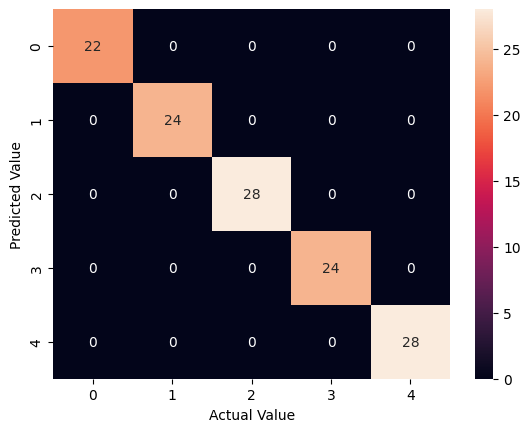


True Positives(TP) =  22 	False Positives(FP) =  0

False Negatives(FN) =  0 	True Negatives(TN) =  104

Accuracy: 1.0
Precision: 1.0
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        28

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [40]:
#Import Gaussian Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
gnb = GaussianNB()
#Train the model using the training sets
gnb.fit(x_train, y_train)
#Predict the response for test datasets
y_pred = gnb.predict(x_test)
print(y_pred)

print("\nConfusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.ylabel("Predicted Value")
plt.xlabel("Actual Value")
plt.show()

cm=confusion_matrix(y_test, y_pred)
TP = cm[0,0]
TN = (cm[1,1] + cm[1,2] + cm[1,3] + cm[1,4] + cm [2,1] + cm[2,2]  + cm[2,3] + cm[2,4] + cm[3,1] +
      cm[3,2] + cm[3,3] + cm[3,4] + cm[4,1] + cm[4,2] + cm[4,3] + cm[4,4])
FP = (cm[0,1] + cm [0,2] + cm[0,3] + cm[0,4])
FN = (cm[1,0] + cm[2,0] + cm[3,0] + cm[4,0])
print('\nTrue Positives(TP) = ', TP,'\tFalse Positives(FP) = ', FP)
print('\nFalse Negatives(FN) = ', FN,'\tTrue Negatives(TN) = ', TN)

print("\nAccuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred,average='micro'))
#average=micro(Treats all predictions equally, regardless of the class distribution)
#average=macro(Calculates the metric for each class and then takes the average)
#average=weighted(Calculates the metric for each class and then takes the weighted average,
#where the weight of each class is proportional to the number of samples in that class)
print("Classification report:\n",classification_report(y_test, y_pred))

#storing the value
store_accuracy['Naive_Bayes']=accuracy_score(y_test,y_pred)

**2.Decision Tree Classifier**

[0 0 3 4 0 2 4 3 4 4 3 3 3 2 0 4 0 3 4 3 3 4 4 2 1 2 1 0 1 3 4 3 1 2 1 0 0
 4 2 3 4 3 3 4 1 4 0 0 3 2 2 4 4 2 2 1 2 2 1 4 4 2 2 1 0 1 2 2 1 0 4 0 0 4
 3 1 2 1 2 2 1 2 4 4 0 0 2 3 0 0 2 0 3 0 2 3 1 4 3 4 3 1 3 4 1 2 2 4 3 1 2
 0 1 0 4 1 1 4 1 0 3 1 3 2 2 4]

Confusion Matrix:



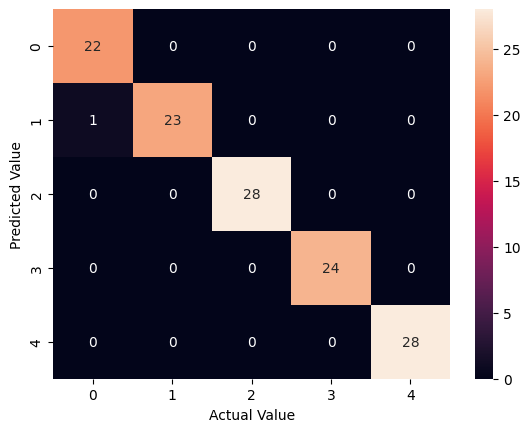


True Positives(TP) =  22 	False Positives(FP) =  0

False Negatives(FN) =  1 	True Negatives(TN) =  103

Accuracy: 0.9920634920634921
Precision: 0.9920634920634921
Classification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.96      0.98        24
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        28

    accuracy                           0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0.99      0.99       126



In [41]:
#Import Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
#Create a Decision Tree Classifier
dtc = DecisionTreeClassifier()
#Train the model using the training sets
dtc.fit(x_train, y_train)
#Predict the response for test datasets
y_pred = dtc.predict(x_test)
print(y_pred)

print("\nConfusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.ylabel("Predicted Value")
plt.xlabel("Actual Value")
plt.show()

cm=confusion_matrix(y_test, y_pred)
TP = cm[0,0]
TN = (cm[1,1] + cm[1,2] + cm[1,3] + cm[1,4] + cm [2,1] + cm[2,2]  + cm[2,3] + cm[2,4] + cm[3,1] +
      cm[3,2] + cm[3,3] + cm[3,4] + cm[4,1] + cm[4,2] + cm[4,3] + cm[4,4])
FP = (cm[0,1] + cm [0,2] + cm[0,3] + cm[0,4])
FN = (cm[1,0] + cm[2,0] + cm[3,0] + cm[4,0])
print('\nTrue Positives(TP) = ', TP,'\tFalse Positives(FP) = ', FP)
print('\nFalse Negatives(FN) = ', FN,'\tTrue Negatives(TN) = ', TN)

print("\nAccuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred,average='micro'))
#average=micro(Treats all predictions equally, regardless of the class distribution)
#average=macro(Calculates the metric for each class and then takes the average)
#average=weighted(Calculates the metric for each class and then takes the weighted average,
#where the weight of each class is proportional to the number of samples in that class)
print("Classification report:\n",classification_report(y_test, y_pred))

#storing the value
store_accuracy['Decision_Tree']=accuracy_score(y_test,y_pred)

[Text(0.5714285714285714, 0.9166666666666666, 'x[7] <= 55.02\ngini = 0.8\nsamples = 504\nvalue = [104, 102, 98, 102, 98]'),
 Text(0.42857142857142855, 0.75, 'gini = 0.0\nsamples = 104\nvalue = [104, 0, 0, 0, 0]'),
 Text(0.7142857142857143, 0.75, 'x[6] <= 5.056\ngini = 0.75\nsamples = 400\nvalue = [0, 102, 98, 102, 98]'),
 Text(0.5714285714285714, 0.5833333333333334, 'x[0] <= 95.5\ngini = 0.667\nsamples = 298\nvalue = [0, 0, 98, 102, 98]'),
 Text(0.42857142857142855, 0.4166666666666667, 'x[3] <= 12.02\ngini = 0.5\nsamples = 200\nvalue = [0, 0, 98, 102, 0]'),
 Text(0.2857142857142857, 0.25, 'x[4] <= 89.0\ngini = 0.02\nsamples = 99\nvalue = [0, 0, 98, 1, 0]'),
 Text(0.14285714285714285, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0]'),
 Text(0.42857142857142855, 0.08333333333333333, 'gini = 0.0\nsamples = 98\nvalue = [0, 0, 98, 0, 0]'),
 Text(0.5714285714285714, 0.25, 'gini = 0.0\nsamples = 101\nvalue = [0, 0, 0, 101, 0]'),
 Text(0.7142857142857143, 0.4166666666666

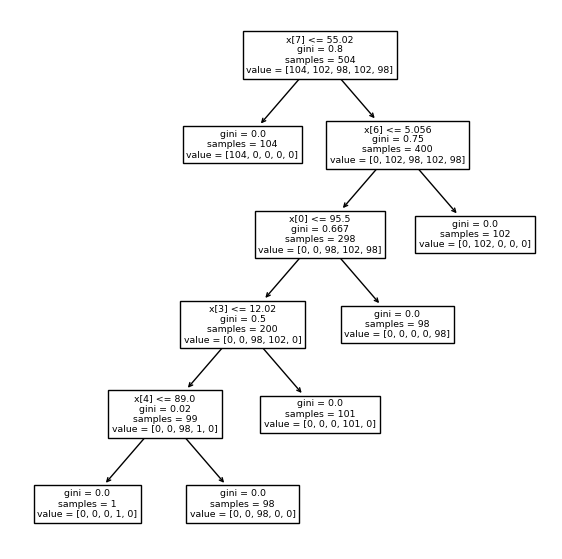

In [42]:
from sklearn import tree
plt.subplots(figsize=(7, 7))     # for resizing the graph
tree.plot_tree(dtc)

**3.Support Vector (SVM) Classifier**

[0 0 3 4 0 2 4 3 4 4 3 3 3 2 0 4 0 3 4 3 3 4 4 2 1 2 1 1 1 3 4 3 1 2 1 0 0
 4 2 3 4 3 3 4 1 4 0 0 3 2 2 4 4 2 2 1 2 2 1 4 4 2 2 1 0 1 2 2 1 0 4 0 0 4
 3 1 2 1 2 2 1 2 4 4 0 0 2 3 0 0 2 0 3 0 2 3 1 4 3 4 3 1 3 4 1 2 2 4 3 1 2
 0 1 0 4 1 1 4 1 0 3 1 3 2 2 4]

Confusion Matrix:



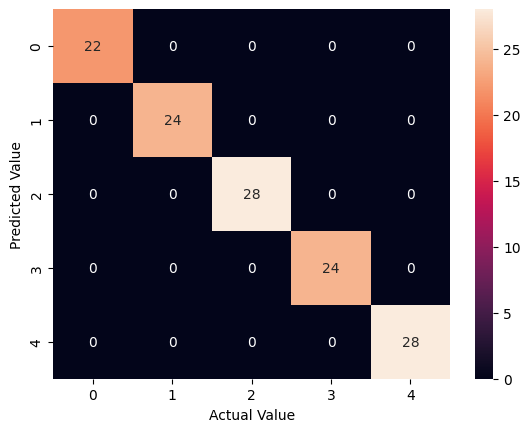


True Positives(TP) =  22 	False Positives(FP) =  0

False Negatives(FN) =  0 	True Negatives(TN) =  104

Accuracy: 1.0
Precision: 1.0
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        28

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [43]:
#Import SVM Model
from sklearn.svm import SVC
#Before proceeding with the prediction process,
#we will standardize the scale for all variables to ensure uniform evaluation.
#If any variable has a wide range or a different scale, its value must be adjusted.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train1 = scaler.fit_transform(x_train)
x_test1 = scaler.fit_transform(x_test)
#Create a Support vector Classifier
svc = SVC()
#Train the model using the training sets
svc.fit(x_train1, y_train)
#Predict the response for test datasets
y_pred = svc.predict(x_test1)
print(y_pred)

print("\nConfusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.ylabel("Predicted Value")
plt.xlabel("Actual Value")
plt.show()

cm=confusion_matrix(y_test, y_pred)
TP = cm[0,0]
TN = (cm[1,1] + cm[1,2] + cm[1,3] + cm[1,4] + cm [2,1] + cm[2,2]  + cm[2,3] + cm[2,4] + cm[3,1] +
      cm[3,2] + cm[3,3] + cm[3,4] + cm[4,1] + cm[4,2] + cm[4,3] + cm[4,4])
FP = (cm[0,1] + cm [0,2] + cm[0,3] + cm[0,4])
FN = (cm[1,0] + cm[2,0] + cm[3,0] + cm[4,0])
print('\nTrue Positives(TP) = ', TP,'\tFalse Positives(FP) = ', FP)
print('\nFalse Negatives(FN) = ', FN,'\tTrue Negatives(TN) = ', TN)

print("\nAccuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred,average='micro'))
#average=micro(Treats all predictions equally, regardless of the class distribution)
#average=macro(Calculates the metric for each class and then takes the average)
#average=weighted(Calculates the metric for each class and then takes the weighted average,
#where the weight of each class is proportional to the number of samples in that class)
print("Classification report:\n",classification_report(y_test, y_pred))

#storing the value
store_accuracy['Support_Vector_Machine']=accuracy_score(y_test,y_pred)


**4.K-Nearest Neighbors (KNN) Classifier**

[0 0 3 4 0 2 4 3 4 4 3 3 3 2 0 4 0 3 4 3 3 4 4 2 1 2 1 1 1 3 4 3 1 2 1 0 0
 4 2 3 4 3 3 4 1 4 0 0 3 2 2 4 4 2 2 1 2 2 1 4 4 2 2 1 0 1 2 2 1 0 4 0 0 4
 3 1 2 1 2 2 1 2 4 4 0 0 2 3 0 0 2 0 3 0 2 3 1 4 3 4 3 1 3 4 1 2 2 4 3 1 2
 0 1 0 4 1 1 4 1 0 3 1 3 2 2 4]

Confusion Matrix:



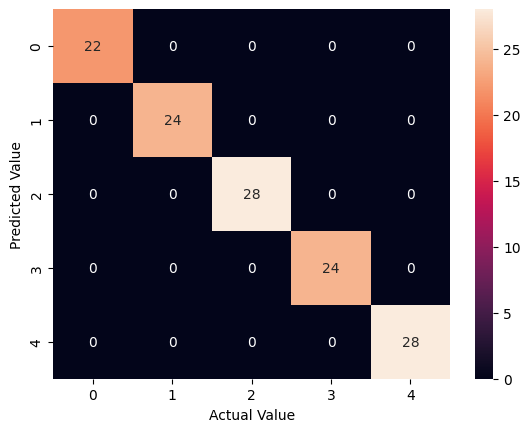


True Positives(TP) =  22 	False Positives(FP) =  0

False Negatives(FN) =  0 	True Negatives(TN) =  104

Accuracy: 1.0
Precision: 1.0
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        28

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [44]:
#Import KNN Model
from sklearn.neighbors import KNeighborsClassifier
#Before proceeding with the prediction process,
#we will standardize the scale for all variables to ensure uniform evaluation.
#If any variable has a wide range or a different scale, its value must be adjusted.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train1 = scaler.fit_transform(x_train)
x_test1 = scaler.fit_transform(x_test)
#Create a K-Nearest Neighbors Classifier
knn=KNeighborsClassifier(n_neighbors=5)
#Train the model using the training sets
knn.fit(x_train1, y_train)
#Predict the response for test datasets
y_pred = knn.predict(x_test1)
print(y_pred)

print("\nConfusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.ylabel("Predicted Value")
plt.xlabel("Actual Value")
plt.show()

cm=confusion_matrix(y_test, y_pred)
TP = cm[0,0]
TN = (cm[1,1] + cm[1,2] + cm[1,3] + cm[1,4] + cm [2,1] + cm[2,2]  + cm[2,3] + cm[2,4] + cm[3,1] +
      cm[3,2] + cm[3,3] + cm[3,4] + cm[4,1] + cm[4,2] + cm[4,3] + cm[4,4])
FP = (cm[0,1] + cm [0,2] + cm[0,3] + cm[0,4])
FN = (cm[1,0] + cm[2,0] + cm[3,0] + cm[4,0])
print('\nTrue Positives(TP) = ', TP,'\tFalse Positives(FP) = ', FP)
print('\nFalse Negatives(FN) = ', FN,'\tTrue Negatives(TN) = ', TN)

print("\nAccuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred,average='micro'))
#average=micro(Treats all predictions equally, regardless of the class distribution)
#average=macro(Calculates the metric for each class and then takes the average)
#average=weighted(Calculates the metric for each class and then takes the weighted average,
#where the weight of each class is proportional to the number of samples in that class)
print("Classification report:\n",classification_report(y_test, y_pred))

#storing the value
store_accuracy['K-Nearest_Neighbors']=accuracy_score(y_test,y_pred)


**5.Logistic Regression Classifier**

[0 0 3 4 0 2 4 3 4 4 3 3 3 2 0 4 0 3 4 3 3 4 4 2 1 2 1 1 1 3 4 3 1 2 1 0 0
 4 2 3 4 3 3 4 1 4 0 0 3 2 2 4 4 2 2 1 2 2 1 4 4 2 2 1 0 1 2 2 1 0 4 0 0 4
 3 1 2 1 2 2 1 2 4 4 0 0 2 3 0 0 2 0 3 0 2 3 1 4 3 4 3 1 3 4 1 2 2 4 3 1 2
 0 1 0 4 1 1 4 1 0 3 1 3 2 2 4]

 Intercept: [-6.25345814  2.24313042  5.33236847  2.45766079 -3.77970154]

 Coefficient: [[-1.28513986 -1.52897522  2.82643173 -1.89603285  2.32477742 -2.5857022
   2.46217411 -1.52897522]
 [-2.20700732 -0.84586381  0.19996266 -0.28494444  1.02748229 -0.24011297
   1.88437944 -0.84586381]
 [ 0.33032339 -0.11975083  0.06384085 -0.45548126 -0.55759699  0.57856759
  -0.11792406 -0.11975083]
 [ 2.13977571  0.14105197 -0.61985827  1.05494651 -0.30698224  1.27658593
  -2.96310824  0.14105197]
 [ 1.02204808  2.35353789 -2.47037697  1.58151204 -2.48768048  0.97066164
  -1.26552125  2.35353789]]

Confusion Matrix:



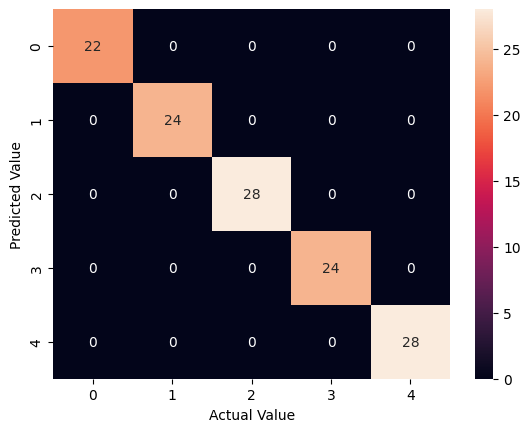


True Positives(TP) =  22 	False Positives(FP) =  0

False Negatives(FN) =  0 	True Negatives(TN) =  104

Accuracy: 1.0
Precision: 1.0
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        28

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

RMSE: 0.0
R-squared: 1.0


In [50]:
#Import Logistic Regression Model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
#Before proceeding with the prediction process,
#we will standardize the scale for all variables to ensure uniform evaluation.
#If any variable has a wide range or a different scale, its value must be adjusted.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train1 = scaler.fit_transform(x_train)
x_test1 = scaler.fit_transform(x_test)
#Create a logistic regression Classifier
lr=LogisticRegression(max_iter=1000)
#Train the model using the training sets
lr.fit(x_train1, y_train)
#Predict the response for test datasets
y_pred = lr.predict(x_test1)
print(y_pred)
print("\n Intercept:",lr.intercept_)
print("\n Coefficient:",lr.coef_)

print("\nConfusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.ylabel("Predicted Value")
plt.xlabel("Actual Value")
plt.show()

cm=confusion_matrix(y_test, y_pred)
TP = cm[0,0]
TN = (cm[1,1] + cm[1,2] + cm[1,3] + cm[1,4] + cm [2,1] + cm[2,2]  + cm[2,3] + cm[2,4] + cm[3,1] +
      cm[3,2] + cm[3,3] + cm[3,4] + cm[4,1] + cm[4,2] + cm[4,3] + cm[4,4])
FP = (cm[0,1] + cm [0,2] + cm[0,3] + cm[0,4])
FN = (cm[1,0] + cm[2,0] + cm[3,0] + cm[4,0])
print('\nTrue Positives(TP) = ', TP,'\tFalse Positives(FP) = ', FP)
print('\nFalse Negatives(FN) = ', FN,'\tTrue Negatives(TN) = ', TN)

print("\nAccuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred,average='micro'))
#average=micro(Treats all predictions equally, regardless of the class distribution)
#average=macro(Calculates the metric for each class and then takes the average)
#average=weighted(Calculates the metric for each class and then takes the weighted average,
#where the weight of each class is proportional to the number of samples in that class)
print("Classification report:\n",classification_report(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("R-squared:", r2)
#storing the value
store_accuracy['Logistic_Regression']=accuracy_score(y_test,y_pred)

Comparisons between the Model's accuracy

In [46]:
store_accuracy

{'Naive_Bayes': 1.0,
 'Decision_Tree': 0.9920634920634921,
 'Support_Vector_Machine': 1.0,
 'K-Nearest_Neighbors': 1.0,
 'Logistic_Regression': 1.0}

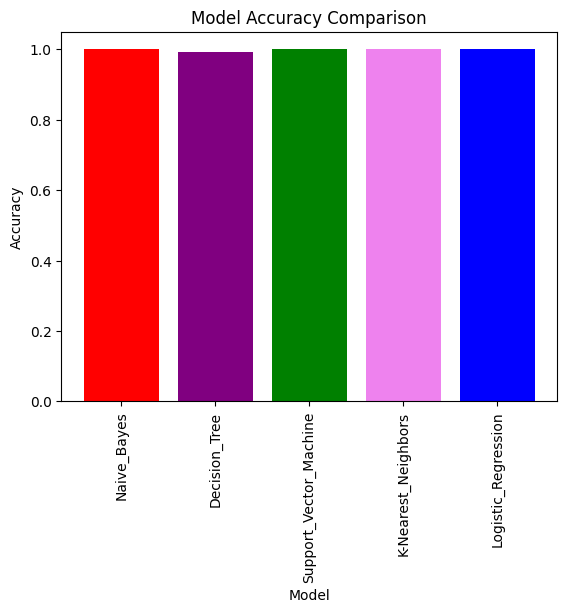

In [47]:
plt.bar(store_accuracy.keys(), store_accuracy.values(),color=['red','purple', 'green', 'violet','blue'], orientation = 'vertical')
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks( rotation='vertical')
plt.show()

### Building Prediction System using Naive Bayes Classifier

Result: [3]

Probability of model: [[1.07429471e-310 5.59069948e-113 3.81197695e-020 1.00000000e+000
  0.00000000e+000]]

--------------Result---------------

Medium high Stress!



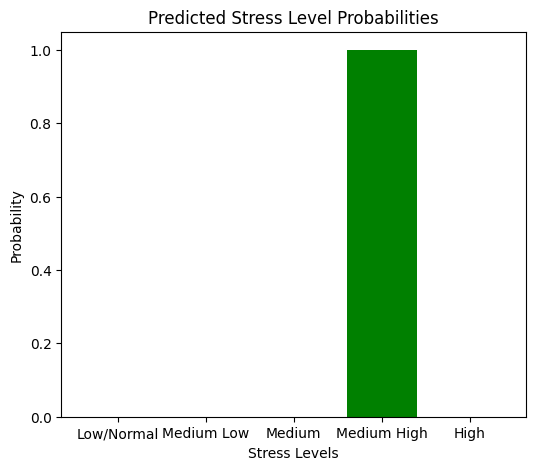

In [48]:
X_test1 = np.array([[90.0, 23.0, 92.0, 15.0, 90.0, 95.0, 2.0, 70.0]])

# Apply the learner to the new, unclassified observation.
result=gnb.predict(X_test1)
print("Result:",result)
# We can even look at the probabilities the learner assigned to each class
print("\nProbability of model:",gnb.predict_proba(X_test1))
print("\n--------------Result---------------")
if result==0:
  print("\nLow/Normal Stress!")
if result==1:
  print("\nMedium low Stress!")
if result==2:
  print("\nMedium Stress!")
if result==3:
  print("\nMedium high Stress!")
else:
  print("\nHigh Stress!")

print()
stress_level_labels = np.array(["Low/Normal", "Medium Low", "Medium", "Medium High", "High"])

# Creating a bar plot for the prediction probabilities
plt.figure(figsize=(6,5))
plt.bar(stress_level_labels, gnb.predict_proba(X_test1)[0], color='green')
plt.xlabel('Stress Levels')
plt.ylabel('Probability')
plt.title('Predicted Stress Level Probabilities')
plt.show()

### Reuse the model by pickling

In [49]:
# loading library
import pickle
# create an iterator object with write permission - model.pkl
with open('model_pkl.pkl', 'wb') as files:
    pickle.dump(gnb, files)